# Speaker Classification – MFCC + KNN (Mozilla Common Voice)

This notebook performs speaker classification using traditional machine learning (K-Nearest Neighbors) on the Mozilla Common Voice dataset.  
We begin by extracting Mel-Frequency Cepstral Coefficients (MFCCs) from `.mp3` audio files (converted to `.wav`) and then use them as features for classification.

The steps follow a similar MFCC extraction pipeline as described in the DT2119 Lab 1.

**Steps Covered:**
1. Convert `.mp3` audio to `.wav`
2. Extract MFCC features using Librosa
3. Visualize MFCCs
4. Prepare features and labels
5. Train and evaluate a KNN classifier

In [ ]:
import os
from pathlib import Path
from pydub import AudioSegment
import librosa
import numpy as np

# Build path relative to the project root
base_dir = Path(os.getcwd())  # This will be the folder where your notebook is
mp3_path = mp3_path = Path("/home/ahmed-bashir/Documents/school/VoiceScope/data/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980499.mp3")
wav_path = mp3_path.with_suffix(".wav")

# Confirm the path is correct
print("MP3 Exists?", mp3_path.exists())

# Convert and load audio
audio = AudioSegment.from_mp3(mp3_path)
audio.export(wav_path, format="wav")
print(f"Converted to WAV: {wav_path}")

# Load with librosa
y, sr = librosa.load(wav_path, sr=None)
print(f"Loaded audio with {len(y)} samples at {sr} Hz")


MP3 Exists? True
Converted to WAV: /home/ahmed-bashir/Documents/school/VoiceScope/data/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980499.wav
Loaded audio with 184320 samples at 32000 Hz


## Step 1: Audio Preprocessing & Feature Extraction

- **Extracted Features**: MFCCs (Mel-Frequency Cepstral Coefficients)
- **Pipeline**:
  1. Load audio (`librosa`)
  2. Pre-emphasis and framing (custom)
  3. Apply Hamming window
  4. FFT and Mel filterbank
  5. Take log spectrum and DCT (MFCC)
  6. Compute mean vector → 13-dimensional feature per clip

- **Output**: Saved as `knn_data.npz` in the `audios/` folder

In [ ]:
import os
from pathlib import Path
from pydub import AudioSegment
import librosa
import numpy as np

# Define paths
base_dir = Path(os.getcwd()).parent  # Go one level up from 'notebooks/'
clips_dir = base_dir / "data" / "cv-corpus-21.0-delta-2025-03-14-en" / "cv-corpus-21.0-delta-2025-03-14" / "en" / "clips"
output_dir = base_dir / "audios"
output_dir.mkdir(exist_ok=True)

# Prepare storage
audio_data = {}

# Loop through a subset or all mp3s (you can limit it for testing)
for mp3_file in clips_dir.glob("*.mp3"):
    try:
        # Convert to WAV using pydub in memory
        audio = AudioSegment.from_mp3(mp3_file)
        wav_path = mp3_file.with_suffix(".temp.wav")
        audio.export(wav_path, format="wav")

        # Load with librosa
        y, sr = librosa.load(wav_path, sr=None)

        # Store in dictionary
        audio_data[mp3_file.name] = {
            "samples": y,
            "rate": sr
        }

        # Clean up the temp WAV file
        os.remove(wav_path)
    except Exception as e:
        print(f"Failed to process {mp3_file.name}: {e}")

# Save to compressed .npz
np.savez_compressed(output_dir / "converted_data.npz", **audio_data)

print(f"Saved {len(audio_data)} files to {output_dir / 'converted_data.npz'}")


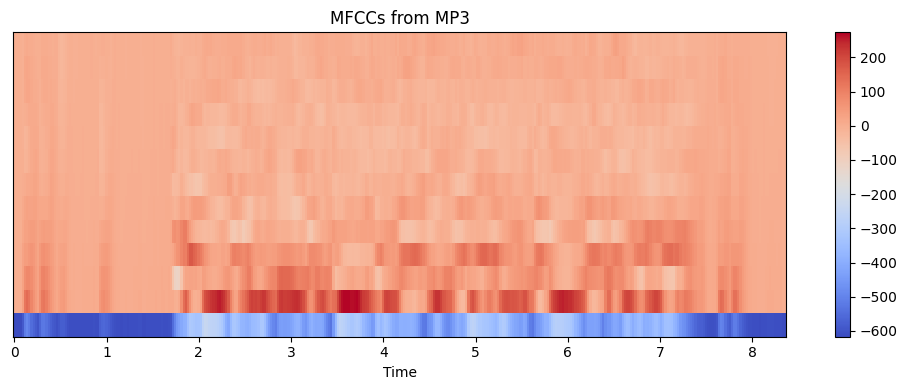

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load MP3 directly
y, sr = librosa.load("/home/ahmed-bashir/Documents/school/VoiceScope/data/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980499.mp3", sr=None)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCCs from MP3")
plt.tight_layout()
plt.show()


In [27]:
import numpy as np
from scipy.signal.windows import hamming
import scipy.fftpack
import matplotlib.pyplot as plt
import librosa

import os

import utils 

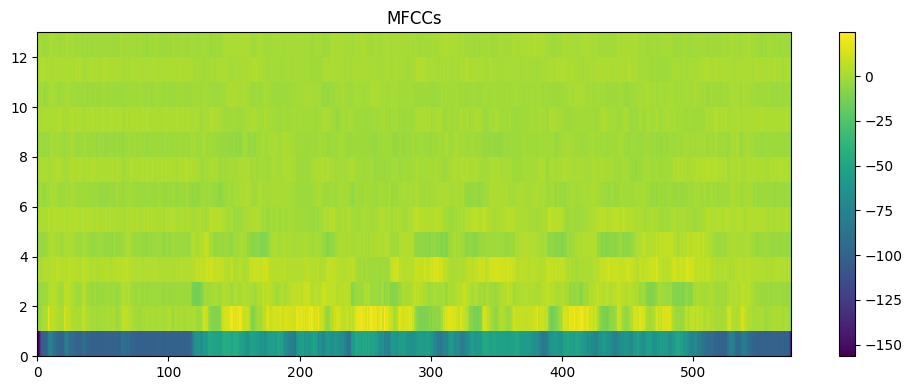

In [28]:
y, sr = librosa.load("/home/ahmed-bashir/Documents/school/VoiceScope/data/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980499.mp3", sr=None)
mfcc = extract_mfcc(y, sr)

plt.figure(figsize=(10, 4))
plt.pcolormesh(mfcc.T)
plt.title("MFCCs")
plt.colorbar()
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
from pathlib import Path

# Define the path
base_dir = Path(os.getcwd()).parent
tsv_path = base_dir / "data" / "cv-corpus-21.0-delta-2025-03-14-en" / "cv-corpus-21.0-delta-2025-03-14" / "en" / "validated.tsv"

# Read the TSV
df = pd.read_csv(tsv_path, sep='\t')

# Show columns
print("Columns:", df.columns.tolist())
df.head()


Columns: ['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain', 'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant', 'locale', 'segment']


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,116398939d6be70fc5fb532924a130c0adf286ac283499...,common_voice_en_41923025.mp3,f5a2a431746c5229ab696ba0e1a518fe7b26e208ff3b84...,"He was born at Wichenford, in Worcestershire, ...",NaN,2,0,thirties,NaN,United States English,NaN,en,NaN
1,24a4da2e8f053a45a0715849c222a40a4b0da9872efb2e...,common_voice_en_42356358.mp3,f6f009587d8812c147af1cc05079e1fcd8120c8a98cdf8...,The Portuguese division was overrun and withdr...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN
2,30849595699bc853c3810a78448acede46888b4e2d0809...,common_voice_en_42165090.mp3,f69afa5e77812e8be0085c874d2a9767323c78ffb43ba6...,Her health by this stage was also poor.,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
3,42d53f34c1bc50f7a7c4ed1765a8d1ffeaf5cd441513cc...,common_voice_en_41921729.mp3,f5739acbefdbd3aac990792966fac4d40dcb39eb8dfa21...,His sporting interests outside of cricket incl...,NaN,2,0,nineties,NaN,England English,NaN,en,NaN
4,436b9e1f9da710d74eb01209f8f269bee70e93cadf2053...,common_voice_en_42528393.mp3,f7d35c60d76f025c45a9495757d1ee0e2b7c206317a288...,The following year he was elected to be part o...,NaN,2,0,teens,NaN,United States English,NaN,en,NaN


In [49]:
import librosa
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# Load the TSV metadata
base_dir = Path.cwd().parent
tsv_path = base_dir / "data" / "cv-corpus-21.0-delta-2025-03-14-en" / "cv-corpus-21.0-delta-2025-03-14" / "en" / "validated.tsv"
df = pd.read_csv(tsv_path, sep='\t')

# Filter required columns
df = df[['client_id', 'path']].dropna()

# Initialize feature and label lists
X = []
y = []

# Define clips directory
clips_dir = tsv_path.parent / "clips"

# Loop over all rows and extract MFCCs
for _, row in tqdm(df.iterrows(), total=len(df)):
    mp3_file = clips_dir / row['path']
    speaker = row['client_id']

    try:
        y_audio, sr = librosa.load(mp3_file, sr=None)
        mfcc = extract_mfcc(y_audio, sr)
        mfcc_mean = np.mean(mfcc, axis=0)  # average over time axis

        if mfcc_mean.shape == (13,):
            X.append(mfcc_mean)
            y.append(speaker)
        else:
            print(f"Skipped: {mp3_file.name}, Bad shape: {mfcc_mean.shape}")

    except Exception as e:
        print(f"Failed: {mp3_file.name}, Reason: {e}")

print("Final shape:", len(X), "samples with", len(set(y)), "unique speakers")

# Convert and save
X = np.array(X)
y = np.array(y)

output_dir = base_dir / "audios"
output_dir.mkdir(exist_ok=True)

output_path = output_dir / "knn_data.npz"
np.savez_compressed(output_path, X=X, y=y)
print(f"Saved dataset to: {output_path}")



  0%|          | 0/249 [00:00<?, ?it/s]

100%|██████████| 249/249 [00:10<00:00, 23.50it/s]

Final shape: 249 samples with 47 unique speakers
Saved dataset to: /home/ahmed-bashir/Documents/school/VoiceScope/audios/knn_data.npz


In [50]:
import numpy as np

data = np.load(base_dir / "audios" / "knn_data.npz")
X = data['X']
y = data['y']


In [51]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Number of unique speakers:", len(np.unique(y)))
print("Feature dimension per sample:", X.shape[1] if len(X.shape) > 1 else "Invalid")


X shape: (249, 13)
y shape: (249,)
Number of unique speakers: 47
Feature dimension per sample: 13


In [53]:
print("First sample:", X[0])
print("Label:", y[0])


First sample: [-7.05821312e+01  1.23246196e+01 -4.50253457e+00  3.17685027e+00
 -6.34666531e-01 -7.35064609e-01 -1.22748401e-01  2.69656586e-02
  6.22414340e-01 -7.14009400e-01  5.56525053e-01  1.16257827e-01
 -4.54843665e-01]
Label: 116398939d6be70fc5fb532924a130c0adf286ac283499da82ac8940d5cd1435a250bba61eb7fcff20f35087275f7f9d5c5d8bafd1a76dd37794a756b4a46851


## Step 2: Data Visualization

- **PCA projection** of MFCC features to 2D
- **Colored by**:
  - Speaker ID
  - Gender
  - Age group

- Goal: visually inspect clustering and speaker separation

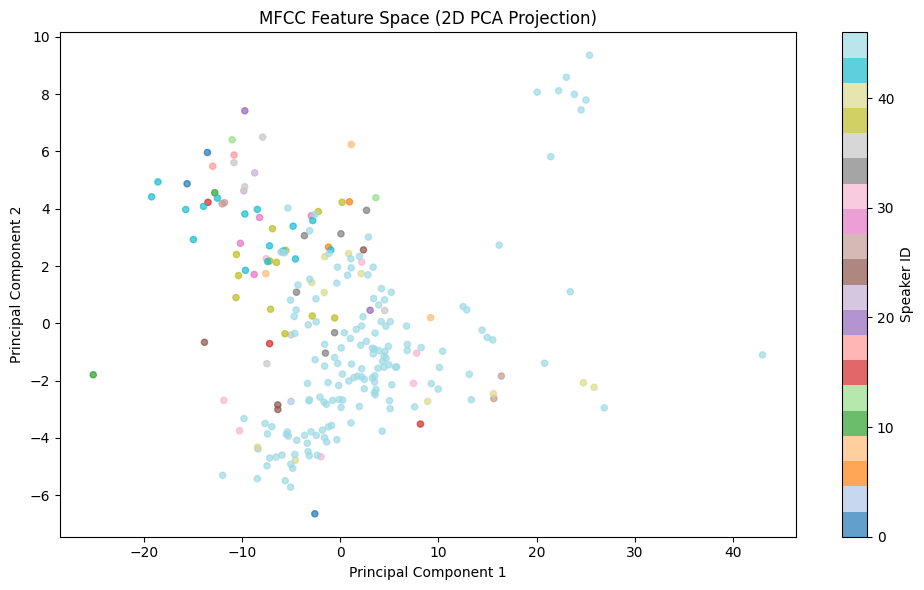

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce MFCC features to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plot with colors by speaker
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=pd.factorize(y)[0], cmap='tab20', s=20, alpha=0.7)

plt.title("MFCC Feature Space (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Speaker ID")
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load metadata
df_full = pd.read_csv(tsv_path, sep='\t')
df_full = df_full[['client_id', 'gender', 'age']].dropna()

# 2. Build feature DataFrame
df_features = pd.DataFrame(X, columns=[f'mfcc_{i}' for i in range(X.shape[1])])
df_features['client_id'] = y

# 3. Merge on client_id
df_plot = pd.merge(df_features, df_full, on='client_id', how='inner')

# 4. Drop rows with missing gender or age (optional: keep only usable samples)
df_plot_filtered = df_plot.dropna(subset=['gender', 'age']).copy()

# 5. Apply PCA on the MFCCs
mfcc_cols = [f'mfcc_{i}' for i in range(13)]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_plot_filtered[mfcc_cols].values)

df_plot_filtered['PC1'] = X_pca[:, 0]
df_plot_filtered['PC2'] = X_pca[:, 1]


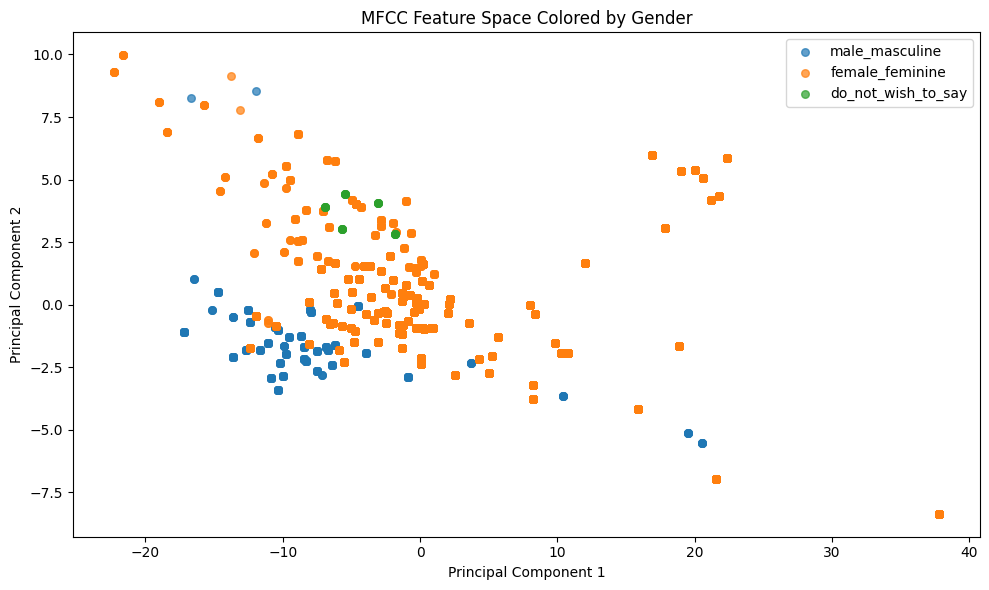

In [62]:
plt.figure(figsize=(10, 6))
for gender in df_plot_filtered['gender'].unique():
    subset = df_plot_filtered[df_plot_filtered['gender'] == gender]
    plt.scatter(subset['PC1'], subset['PC2'], label=gender, alpha=0.7, s=30)

plt.title("MFCC Feature Space Colored by Gender")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()


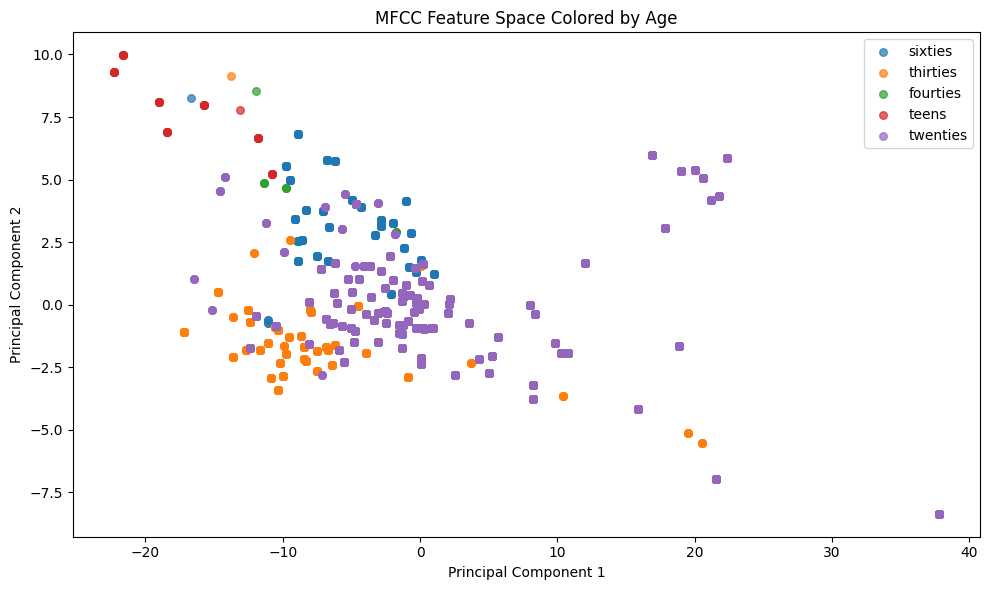

In [63]:
plt.figure(figsize=(10, 6))
for age in df_plot_filtered['age'].unique():
    subset = df_plot_filtered[df_plot_filtered['age'] == age]
    plt.scatter(subset['PC1'], subset['PC2'], label=age, alpha=0.7, s=30)

plt.title("MFCC Feature Space Colored by Age")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()


## Step 3: Dataset Splitting

- **Filtered** speakers with at least 2 samples
- **Stratified split**: 80% train, 20% test
- **Saved as**:
  - `train.npz`
  - `test.npz`
  - (also `train_test_split.npz` as backup)

In [68]:
import numpy as np
import pandas as pd

# Load the full dataset again
data = np.load(base_dir / "audios" / "knn_data.npz")
X = data['X']
y = data['y']
y_series = pd.Series(y)

# Count speaker samples
speaker_counts = y_series.value_counts()
valid_speakers = speaker_counts[speaker_counts >= 2].index

# Filter X and y together
mask = y_series.isin(valid_speakers).values  # convert to NumPy boolean array
X_filtered = X[mask]
y_filtered = y[mask]


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_filtered
)


In [73]:
# Define output path
split_path = base_dir / "audios" / "train_test_split.npz"

# Save to compressed .npz
np.savez_compressed(
    split_path,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

print(f"Saved split data to: {split_path}")


Saved split data to: /home/ahmed-bashir/Documents/school/VoiceScope/audios/train_test_split.npz


In [71]:
# Save training set
np.savez_compressed(base_dir / "audios" / "train.npz", X=X_train, y=y_train)

# Save test set
np.savez_compressed(base_dir / "audios" / "test.npz", X=X_test, y=y_test)


## Step 4: Train KNN Classifier

- **Model**: `KNeighborsClassifier(n_neighbors=5)`
- **Metric**: Euclidean distance
- **Evaluation**:
  - Accuracy
  - Classification Report
  - Confusion Matrix (with heatmap)

In [77]:
# train_knn.py (or just a separate cell)
from sklearn.neighbors import KNeighborsClassifier
import joblib
import numpy as np

# Load training data
data = np.load(base_dir / "audios" / "train.npz")
X_train = data["X"]
y_train = data["y"]

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Save the trained model
joblib.dump(knn, base_dir / "audios" / "knn_model.joblib")
print("KNN model trained and saved.")


KNN model trained and saved.


KNN Accuracy: 0.7333


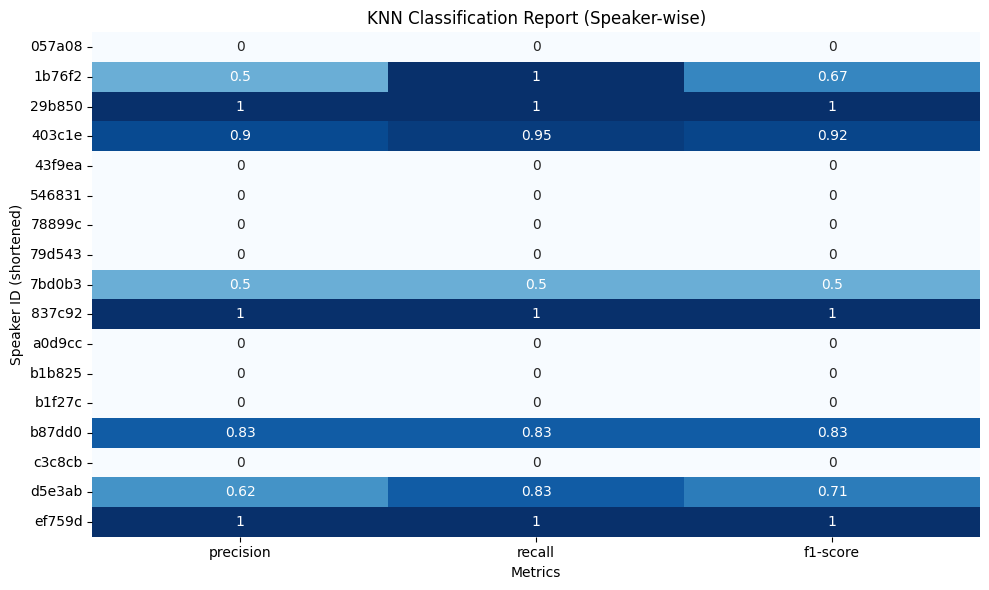

In [83]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Generate classification report as a dict
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

# Optional: shorten speaker labels (e.g., first 6 characters)
short_labels = [str(label)[:6] for label in report.keys() if label not in ["accuracy", "macro avg", "weighted avg"]]
new_keys = short_labels + ["macro avg", "weighted avg", "accuracy"]
report_df = pd.DataFrame(report).T

# Optional: rename the index for short labels
report_df.index = new_keys

# Round and reorder
report_df = report_df[["precision", "recall", "f1-score", "support"]]
report_df = report_df.round(2)

# Display nicely
print("KNN Accuracy:", round(accuracy_score(y_test, y_pred), 4))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap="Blues", cbar=False)
plt.title("KNN Classification Report (Speaker-wise)")
plt.xlabel("Metrics")
plt.ylabel("Speaker ID (shortened)")
plt.tight_layout()
plt.show()


In [87]:
from pathlib import Path

# Define path
csv_path = base_dir / "audios" / "knn_classification_report.csv"

# Create directory if needed
csv_path.parent.mkdir(parents=True, exist_ok=True)

# Save CSV
report_df.to_csv(csv_path)
print(f"Saved classification report to: {csv_path}")


Saved classification report to: /home/ahmed-bashir/Documents/school/VoiceScope/audios/knn_classification_report.csv


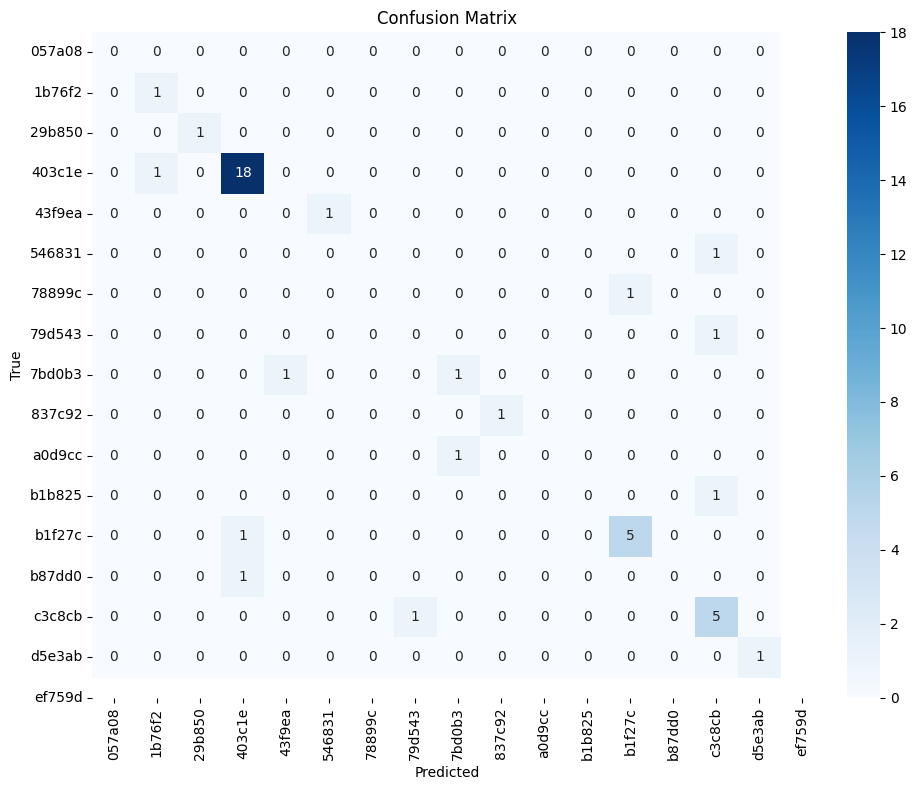

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=short_labels, yticklabels=short_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(base_dir / "audios" / "knn_confusion_matrix.png")
plt.show()


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_filtered, y_filtered, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


Cross-validation scores: [0.62222222 0.68888889 0.77777778 0.71111111 0.77272727]
Mean CV accuracy: 0.7145


/home/ahmed-bashir/Documents/school/VoiceScope/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
